<a href="https://colab.research.google.com/github/dmswl0707/CoronaCoprosperityCard_DataScience/blob/main/%EC%97%B0%EB%A0%B9%EB%B3%84_%ED%8C%90%EB%A7%A4%EA%B1%B4%EC%88%98%EC%99%80_%EB%B0%9C%EC%83%9D%EA%B8%88%EC%95%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import csv

from google.colab import drive
drive.mount('/content/drive') #구글 드라이브에 접근
filename='/content/drive/My Drive/Colab Notebooks/data/seoul2020.csv' #파일 경로설정

font_dir='/content/drive/My Drive/Colab Notebooks/data/NanumBarunGothic.ttf'
fontprop=fm.FontProperties(fname=font_dir, size=12)

data=pd.read_csv(filename, encoding='CP949') #csv 파일 불러오기
print(data.head(10)) 
print(data.info()) #파일정보
print(data.index)
print(data.columns)

Mounted at /content/drive
   기준_년_코드  기준_분기_코드 상권_구분_코드  ... 연령대_50_매출_건수  연령대_60_이상_매출_건수 점포수
0     2020         2        U  ...            5                5   8
1     2020         2        U  ...         1062             1003   8
2     2020         2        U  ...         1722             1862   5
3     2020         2        U  ...         2101              781   6
4     2020         2        U  ...         4241             1235   6
5     2020         2        U  ...          387              149   8
6     2020         2        U  ...         3479             2861  14
7     2020         2        U  ...        15452             5373  54
8     2020         2        U  ...        14868             7207  12
9     2020         2        U  ...        47000            28634   8

[10 rows x 80 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66511 entries, 0 to 66510
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           -------------- 

In [6]:
data_null=np.sum(pd.isnull(data)) #결측치 확인
#data_null.tolist()

In [7]:
###필요한 index 추출
 
data_sample1=data[['연령대_10_매출_건수','연령대_20_매출_건수','연령대_30_매출_건수','연령대_40_매출_건수','연령대_50_매출_건수','연령대_60_이상_매출_건수','연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
       '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액']]

print(data_sample1.head(100))



    연령대_10_매출_건수  연령대_20_매출_건수  ...  연령대_50_매출_금액  연령대_60_이상_매출_금액
0              0            10  ...        155459           170033
1             66          2146  ...     207362439        249924007
2              0             0  ...    3529373752       3202242038
3            232         10926  ...      57924025         29309323
4           1478         20434  ...     154108436         43507078
..           ...           ...  ...           ...              ...
95           604         34968  ...    4621149950       6831490734
96           523          9463  ...    2432212861       3765970601
97            22          1681  ...     175665367        194766424
98            49          1128  ...      48707071        184248580
99             0          3271  ...     183420766        320475018

[100 rows x 12 columns]


In [8]:
###연령-판매건수 리스트로 뽑기

data_sample2=data[['기준_년_코드','상권_구분_코드_명','서비스_업종_코드_명','연령대_10_매출_건수']]
data1_sorted_by_index = data_sample2.sort_values(by=['연령대_10_매출_건수'], ascending=False)
print(data1_sorted_by_index.head(100))

data_sample2=data[['기준_년_코드','상권_구분_코드_명','서비스_업종_코드_명','연령대_20_매출_건수']]
data2_sorted_by_index = data_sample2.sort_values(by=['연령대_20_매출_건수'], ascending=False)
print(data2_sorted_by_index.head(100))

A = data2_sorted_by_index.head(100) ##


data_sample2=data[['기준_년_코드','상권_구분_코드_명','서비스_업종_코드_명','연령대_30_매출_건수']]
data3_sorted_by_index = data_sample2.sort_values(by=['연령대_30_매출_건수'], ascending=False)
print(data3_sorted_by_index.head(100))

B = data3_sorted_by_index.head(100) ##

data_sample2=data[['기준_년_코드','상권_구분_코드_명','서비스_업종_코드_명','연령대_40_매출_건수']]
data4_sorted_by_index = data_sample2.sort_values(by=['연령대_40_매출_건수'], ascending=False)
print(data4_sorted_by_index.head(100))

C = data4_sorted_by_index.head(100) ##

data_sample2=data[['기준_년_코드','상권_구분_코드_명','서비스_업종_코드_명','연령대_50_매출_건수']]
data5_sorted_by_index = data_sample2.sort_values(by=['연령대_50_매출_건수'], ascending=False)
print(data5_sorted_by_index.head(100))

D = data5_sorted_by_index.head(100) ##

data_sample2=data[['기준_년_코드','상권_구분_코드_명','서비스_업종_코드_명','연령대_60_이상_매출_건수']]
data6_sorted_by_index = data_sample2.sort_values(by=['연령대_60_이상_매출_건수'], ascending=False)
print(data6_sorted_by_index.head(100))



########20대와 60대 이상 소비건수 제일 많아 (자기를 위한 소비)



       기준_년_코드 상권_구분_코드_명 서비스_업종_코드_명  연령대_10_매출_건수
13559     2020       골목상권  컴퓨터및주변장치판매        140639
30803     2020       골목상권         핸드폰        133460
64061     2020       골목상권         핸드폰        133298
37865     2020       발달상권         PC방         89360
40090     2020       발달상권       커피-음료         86155
...        ...        ...         ...           ...
8185      2020       발달상권         PC방         21198
4515      2020       발달상권         PC방         21093
23956     2020       골목상권         PC방         21069
15905     2020       골목상권         편의점         20915
39961     2020       발달상권         편의점         20801

[100 rows x 4 columns]
       기준_년_코드 상권_구분_코드_명 서비스_업종_코드_명  연령대_20_매출_건수
40090     2020       발달상권       커피-음료       1184669
42870     2020       발달상권         편의점       1143049
8840      2020       발달상권        일반의류       1105057
9601      2020       발달상권         편의점       1090943
6839      2020       발달상권       커피-음료       1071003
...        ...        ...         ...   

In [9]:
###연령-판매금액 리스트로 뽑기

data_sample2=data[['기준_년_코드','상권_구분_코드_명','서비스_업종_코드_명','연령대_10_매출_금액']]                                           
data01_sorted_by_index = data_sample2.sort_values(by=['연령대_10_매출_금액'], ascending=False)
print(data01_sorted_by_index.head(100))

data_sample2=data[['기준_년_코드','상권_구분_코드_명','서비스_업종_코드_명','연령대_20_매출_금액']]
data02_sorted_by_index = data_sample2.sort_values(by=['연령대_20_매출_금액'], ascending=False)
print(data02_sorted_by_index.head(100))

a = data02_sorted_by_index.head(100) ##


data_sample2=data[['기준_년_코드','상권_구분_코드_명','서비스_업종_코드_명','연령대_30_매출_금액']]
data03_sorted_by_index = data_sample2.sort_values(by=['연령대_30_매출_금액'], ascending=False)
print(data03_sorted_by_index.head(100))

b = data03_sorted_by_index.head(100)##


data_sample2=data[['기준_년_코드','상권_구분_코드_명','서비스_업종_코드_명','연령대_40_매출_금액']]
data04_sorted_by_index = data_sample2.sort_values(by=['연령대_40_매출_금액'], ascending=False)
print(data04_sorted_by_index.head(100))

c = data04_sorted_by_index.head(100) ##


data_sample2=data[['기준_년_코드','상권_구분_코드_명','서비스_업종_코드_명','연령대_50_매출_금액']]
data05_sorted_by_index = data_sample2.sort_values(by=['연령대_50_매출_금액'], ascending=False)
print(data05_sorted_by_index.head(100))

d = data05_sorted_by_index.head(100)##


data_sample2=data[['기준_년_코드','상권_구분_코드_명','서비스_업종_코드_명','연령대_60_이상_매출_금액']]
data06_sorted_by_index = data_sample2.sort_values(by=['연령대_60_이상_매출_금액'], ascending=False)
print(data06_sorted_by_index.head(100))

###40대가 1위, 50대가 2위로 판매금액 제일 높음

       기준_년_코드 상권_구분_코드_명 서비스_업종_코드_명  연령대_10_매출_금액
40064     2020       발달상권        일반의류    2156952488
6814      2020       발달상권        일반의류    1780254676
7810      2020       발달상권  컴퓨터및주변장치판매    1392952565
41071     2020       발달상권  컴퓨터및주변장치판매    1040203384
41108     2020       발달상권  컴퓨터및주변장치판매     943819228
...        ...        ...         ...           ...
4248      2020       전통시장         화장품     207658228
33470     2020       관광특구        일반의류     207228632
18417     2020       골목상권         PC방     206372232
6206      2020       발달상권         화장품     206298455
6841      2020       발달상권       분식전문점     205349525

[100 rows x 4 columns]
       기준_년_코드 상권_구분_코드_명 서비스_업종_코드_명  연령대_20_매출_금액
7810      2020       발달상권  컴퓨터및주변장치판매   38362266773
41071     2020       발달상권  컴퓨터및주변장치판매   35284177853
42026     2020       발달상권       수산물판매   29522251103
41108     2020       발달상권  컴퓨터및주변장치판매   26935041548
7846      2020       발달상권  컴퓨터및주변장치판매   26411589363
...        ...        ...         ...   

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52964 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51020 missing from current font.
  font.set_

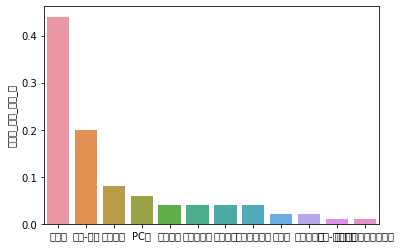

<Figure size 36000x36000 with 0 Axes>

In [10]:
#대문자 - 판매건수, 소문자 -발생금액, 20대~50대, 상위 100 csv
Q = A['서비스_업종_코드_명'].value_counts(normalize=True)
sns.barplot(x=Q.index, y=Q)
plt.figure(figsize=(500,500))
plt.show()

#W = B['서비스_업종_코드_명'].value_counts(normalize=True)
#E = C['서비스_업종_코드_명'].value_counts(normalize=True)
#R =D['서비스_업종_코드_명'].value_counts(normalize=True)

#T=a['서비스_업종_코드_명'].value_counts(normalize=True)
#Y=b['서비스_업종_코드_명'].value_counts(normalize=True)
#U=c['서비스_업종_코드_명'].value_counts(normalize=True)
#I=d['서비스_업종_코드_명'].value_counts(normalize=True)



In [11]:
AA = A.values.tolist()
Aa = a.values.tolist() 

twenty_store = AA + Aa
print(twenty_store)
twenty_store=pd.DataFrame(twenty_store)
twenty_store.to_excel(excel_writer='/content/drive/My Drive/Colab Notebooks/data/revised_data/twenty_store.xlsx')


BB = B.values.tolist() 
Bb = b.values.tolist()

thirty_store = BB + Bb
print(thirty_store)
thirty_store=pd.DataFrame(thirty_store)
thirty_store.to_excel(excel_writer='/content/drive/My Drive/Colab Notebooks/data/revised_data/thirty_store.xlsx')


CC = C.values.tolist() 
Cc = c.values.tolist() 

forty_store = CC + Cc
print(forty_store)
forty_store=pd.DataFrame(forty_store)
forty_store.to_excel(excel_writer='/content/drive/My Drive/Colab Notebooks/data/revised_data/forty_store.xlsx')

DD = D.values.tolist()
Dd = d.values.tolist()

fifty_store = DD + Dd
print(fifty_store)
fifty_store=pd.DataFrame(fifty_store)
fifty_store.to_excel(excel_writer='/content/drive/My Drive/Colab Notebooks/data/revised_data/fifty_store.xlsx')






[[2020, '발달상권', '커피-음료', 1184669], [2020, '발달상권', '편의점', 1143049], [2020, '발달상권', '일반의류', 1105057], [2020, '발달상권', '편의점', 1090943], [2020, '발달상권', '커피-음료', 1071003], [2020, '발달상권', '일반의류', 1047676], [2020, '발달상권', '편의점', 1018580], [2020, '발달상권', '편의점', 973510], [2020, '발달상권', '편의점', 813923], [2020, '관광특구', '전자상거래업', 793140], [2020, '전통시장', '전자상거래업', 793140], [2020, '전통시장', '전자상거래업', 791356], [2020, '관광특구', '전자상거래업', 791356], [2020, '발달상권', '커피-음료', 759371], [2020, '관광특구', '편의점', 757110], [2020, '발달상권', '제과점', 720465], [2020, '관광특구', '편의점', 714529], [2020, '골목상권', '컴퓨터및주변장치판매', 709591], [2020, '발달상권', 'PC방', 707670], [2020, '발달상권', '편의점', 697913], [2020, '발달상권', '커피-음료', 686303], [2020, '발달상권', '반찬가게', 685989], [2020, '관광특구', '편의점', 681883], [2020, '발달상권', 'PC방', 677223], [2020, '발달상권', '반찬가게', 674153], [2020, '관광특구', '편의점', 660503], [2020, '발달상권', '일반의류', 657341], [2020, '발달상권', '일반의류', 656162], [2020, '관광특구', '커피-음료', 637597], [2020, '발달상권', '일반의류', 621267], [2020, '발달상권', '커피-음료', 58

In [12]:

store_amount20= A['서비스_업종_코드_명'].tolist()
store_amount30= B['서비스_업종_코드_명'].tolist()
store_amount40= c['서비스_업종_코드_명'].tolist()
store_amount50= d['서비스_업종_코드_명'].tolist()

store_amount = store_amount20 + store_amount30 + store_amount40 + store_amount50
print(len(store_amount))


store_money20= a['서비스_업종_코드_명'].tolist()
store_money30= b['서비스_업종_코드_명'].tolist()
store_money40= c['서비스_업종_코드_명'].tolist()
store_money50= d['서비스_업종_코드_명'].tolist()

store_money = store_money20 + store_money30 + store_money40 + store_money50
print(len(store_money))


store_list = store_amount + store_money

# 전체 업종리스트에서 중복된 업종 추리기
new_store_list = []
for v in store_list:
    if v not in new_store_list:
        new_store_list.append(v)
print(new_store_list)


400
400
['커피-음료', '편의점', '일반의류', '전자상거래업', '제과점', '컴퓨터및주변장치판매', 'PC방', '반찬가게', '한식음식점', '수산물판매', '호프-간이주점', '슈퍼마켓', '의약품', '문구', '가전제품', '육류판매', '시계및귀금속', '의료기기', '일반의원', '조명용품', '화장품', '일반교습학원', '운동/경기용품', '청과상', '외국어학원', '가구', '섬유제품', '양식음식점', '신발']


In [ ]:
#data01 = pd.DataFrame(sale_list)  
#sale_list.to_csv('/content/drive/My Drive/Colab Notebooks/data/revised_data/sale_list.csv') 

#data02 = pd.DataFrame(store_list) 
#store_list.to_csv('/content/drive/My Drive/Colab Notebooks/data/revised_data/store_list.csv') 


#data03 = pd.DataFrame(age_list) 
#age_list.to_csv('/content/drive/My Drive/Colab Notebooks/data/revised_data/age_list.csv') 